# Exploring St Louis Crime Dataset



In [1]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(lubridate)
library(RColorBrewer)
library(plotly)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



### Additional information about the dataset

More information about the crime dataset can be found at [SLMPD](https://slmpd.org/Crime/CrimeDataFrequentlyAskedQuestions.pdf)

Information on how crimes are classified can be found at [UCR](https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions)

### Data sources

**Crime Data:**[Metropolitan Police Department of Saint Louis, MO](https://slmpd.org/Crimereports.shtml)

**Neigborhood shapefile:** [here](https://www.stlouis-mo.gov/data/formats/format.cfm?id=21)

**Population data:**[here](https://www.stlouis-mo.gov/government/departments/planning/research/census/data/neighborhoods/index.cfm?censusYear=2010&comparisonYear=2020&measure=P0010001)

### Instead of looking at all types of crime, we'll focus on just one class. In this case, we'll look into crimes classified as rape.

In [2]:
df <- read.csv('proj_data/st_louis_crime_data_2010_2020.csv')
head(df)

MonthReportedtoMSHP,DateOccured,NewCrimeIndicator,UnfoundedCrimeIndicator,AdministrativeAdjustmentIndicator,Count,Crime,District,Description,ILEADSAddress,ILEADSStreet,Neighborhood,LocationName,LocationComment,CADAddress,CADStreet,XCoord,YCoord
<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
2010-01,1/1/03 15:00,Y,,,1,172300,5,SEX OFFNS-STATUATORY SODOMY/FIRST,1400,PENROSE ST,65,,,,,905013.9,1031774.0
2010-01,1/1/05 8:00,Y,,,1,23000,5,RAPE-ATTEMPT FORCIBLE RAPE/FORCIBLE INCEST,2800,MONTGOMERY ST,59,,,2800,MONTGOMERY,901060.3,1026457.0
2010-01,1/1/07 8:00,Y,,,1,115400,3,STLG BY DECEIT/IDENTITY THEFT REPORT,3008,MAGNOLIA AVE,25,,,3008,MAGNOLIA,896867.1,1009094.0
2010-01,1/1/09 8:00,Y,,,1,71013,1,AUTO THEFT-PERM RETNT/UNRECOV OVER 48HR,4752,LOUISIANA AVE,16,,,4752,LOUISIANA,892262.1,997227.7
2010-01,1/1/09 9:27,Y,,,1,179210,6,SEX OFFNS-CHILD MOLESTATION-FIRST DEGREE,5400,ARLINGTON AVE,71,,,5400,ARLINGTON,893373.0,1041773.0
2010-01,1/1/09 19:00,Y,,,1,71013,6,AUTO THEFT-PERM RETNT/UNRECOV OVER 48HR,4964,DAVISON AVE,72,,,4964,DAVISON,891009.9,1041305.0


### Organize the data!

In [3]:
#Selecting the variables we might need
df <- df  %>% select('MonthReportedtoMSHP',
                      'DateOccured',
                      'Count',
                      'Crime',
                      'Description',
                      'Neighborhood',
                      'XCoord','YCoord')


# Filtering out what are considered Part II crime types
df <- df %>% filter(Crime <90000)

# Assigning UCR Part I crime types to clearer categories
df <- df %>% mutate(crimeType = as.factor(ifelse(Crime < 19999, 'Homicide',
                                      ifelse(Crime < 29999, 'Rape',
                                      ifelse(Crime < 39999, 'Robbery',
                                      ifelse(Crime < 49999, 'Aggravated Assault',
                                      ifelse(Crime < 59999, 'Burglary',
                                      ifelse(Crime < 69999, 'Larceny',
                                      ifelse(Crime < 79999, 'Vehicle Theft', 
                                                             'Arson')))))))))

#Making the distintion between public and non public areas
df <-df  %>% mutate(publicArea = as.factor(ifelse(Neighborhood < 80, 'N','Y')))

#Convert datatime data
df <-df  %>% mutate(DateOccured = mdy_hm(DateOccured))
#Getting different time components
df <-df  %>% mutate(yearOccured = as.factor(year(DateOccured)),
                      monthOccured = as.factor(month(DateOccured)),
                      dayOccured = as.factor(day(DateOccured)),
                      wdayOccured = as.factor(wday(DateOccured, label = TRUE, abbr = TRUE))
                     )
#More resctructure time reported
df <- df  %>% 
    separate(MonthReportedtoMSHP, into = c("yearReported", "monthReported"), sep = "-") %>% 
    mutate(yearReported = as.factor(yearReported), 
           monthReported = as.factor(monthReported),
           Neighborhood = as.factor(Neighborhood))
# Selecting confimed crime(Count != -1) from 2015-2020
#Getting of some columns 
df_crime_all <- df %>% filter(Count != -1) %>% 
    filter(as.numeric(as.character(yearOccured)) >= 2015 & as.numeric(as.character(yearReported)) >= 2015) %>% 
    select(-c('Crime')) 

#Selecting rape from 2015-2020
df_crime_rape <- df_crime_all %>%  filter(crimeType=='Rape')

In [4]:
df_crime_all

yearReported,monthReported,DateOccured,Count,Description,Neighborhood,XCoord,YCoord,crimeType,publicArea,yearOccured,monthOccured,dayOccured,wdayOccured
<fct>,<fct>,<dttm>,<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<ord>
2015,01,2015-01-01 00:23:00,1,AGG.ASSAULT-FIREARM/CITIZEN ADULT 1ST DEGREE,38,893502.2,1022984.0,Aggravated Assault,N,2015,1,1,Thu
2015,01,2015-01-01 00:23:00,1,AGG.ASSAULT-FIREARM/CITIZEN ADULT 1ST DEGREE,38,893502.2,1022984.0,Aggravated Assault,N,2015,1,1,Thu
2015,01,2015-01-01 00:23:00,1,AGG.ASSAULT-FIREARM/CITIZEN ADULT 1ST DEGREE,38,893502.2,1022984.0,Aggravated Assault,N,2015,1,1,Thu
2015,01,2015-01-01 01:03:00,1,AGG.ASSAULT-FIREARM/CITIZEN ADULT 1ST DEGREE,57,894450.8,1029449.0,Aggravated Assault,N,2015,1,1,Thu
2015,01,2015-01-01 01:03:00,1,AGG.ASSAULT-FIREARM/CITIZEN ADULT 1ST DEGREE,57,894450.8,1029449.0,Aggravated Assault,N,2015,1,1,Thu
2015,01,2015-01-01 00:25:00,1,ASSLT-AGGRAV-FIREARM-3RD-ADULT-DOMESTIC,30,895980.2,1006357.0,Aggravated Assault,N,2015,1,1,Thu
2015,01,2015-01-01 02:30:00,1,"AGG.ASSAULT-HNDS,FST,FEET/CTZEN ADLT 2ND DEGRE",36,905580.8,1019185.0,Aggravated Assault,N,2015,1,1,Thu
2015,01,2015-01-01 02:40:00,1,AGG.ASSAULT-FIREARM/CITIZEN CHILD 1ST DEGREE,10,873145.9,1007845.0,Aggravated Assault,N,2015,1,1,Thu
2015,01,2015-01-01 03:05:00,1,"LARCENY-FROM BUILDING $500 - $24,999",62,908103.1,1020476.0,Larceny,N,2015,1,1,Thu


In [5]:
df_crime_rape

yearReported,monthReported,DateOccured,Count,Description,Neighborhood,XCoord,YCoord,crimeType,publicArea,yearOccured,monthOccured,dayOccured,wdayOccured
<fct>,<fct>,<dttm>,<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<ord>
2015,01,2015-01-01 01:00:00,1,RAPE -- FORCIBLE,36,0,0,Rape,N,2015,1,1,Thu
2015,01,2015-01-04 01:00:00,1,RAPE -- FORCIBLE,51,0,0,Rape,N,2015,1,4,Sun
2015,01,2015-01-07 12:30:00,1,RAPE -- FORCIBLE,78,0,0,Rape,N,2015,1,7,Wed
2015,01,2015-01-12 00:30:00,1,RAPE -- FORCIBLE,67,0,0,Rape,N,2015,1,12,Mon
2015,01,2015-01-18 05:00:00,1,RAPE -- FORCIBLE,37,0,0,Rape,N,2015,1,18,Sun
2015,01,2015-01-14 10:27:00,1,RAPE -- FORCIBLE,16,0,0,Rape,N,2015,1,14,Wed
2015,01,2015-01-22 14:00:00,1,RAPE -- FORCIBLE,55,0,0,Rape,N,2015,1,22,Thu
2015,01,2015-01-24 23:00:00,1,RAPE -- FORCIBLE,38,0,0,Rape,N,2015,1,24,Sat
2015,01,2015-01-16 01:30:00,1,RAPE -- FORCIBLE,5,0,0,Rape,N,2015,1,16,Fri


### First look

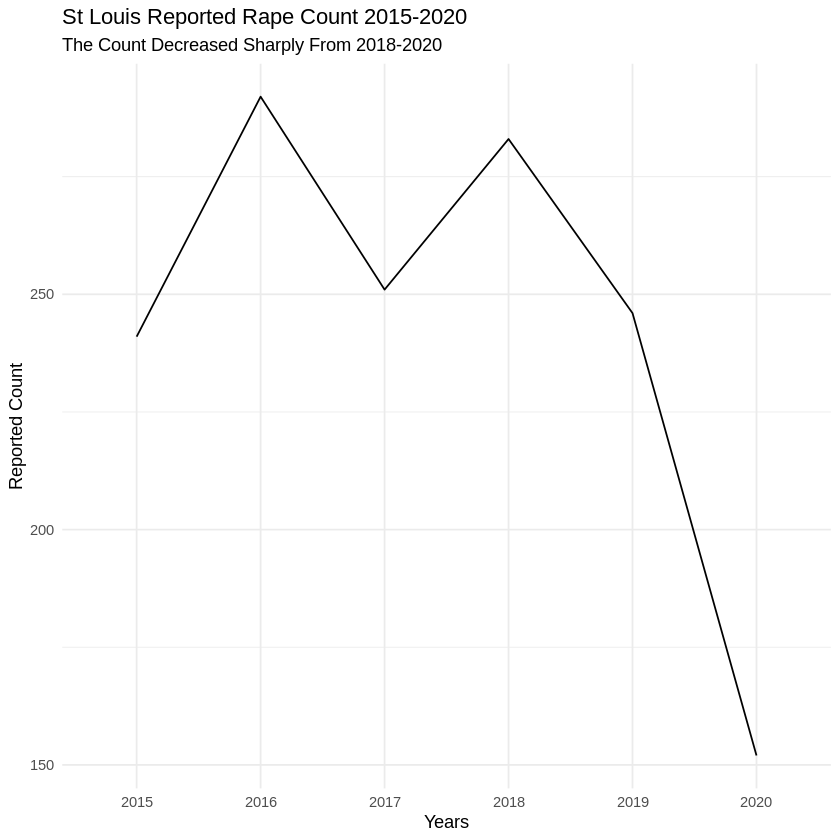

In [6]:
df_crime_rape %>% group_by(yearOccured,crimeType)  %>% summarize(crime_count = sum(Count)) %>% 
ggplot(aes(yearOccured,crime_count, group =crimeType)) +
geom_line() + 
labs(x='Years',y='Reported Count',
    title = 'St Louis Reported Rape Count 2015-2020',
    subtitle = 'The Count Decreased Sharply From 2018-2020')+
theme_minimal()

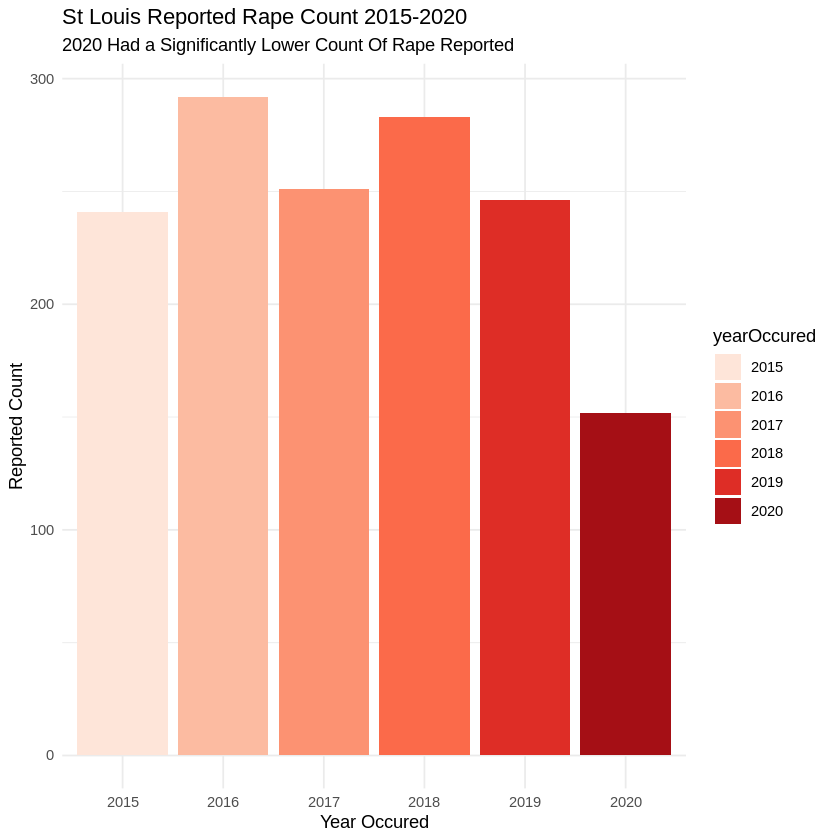

In [7]:
df_crime_rape %>% 
    ggplot(aes(yearOccured, fill = yearOccured )) + geom_bar()+
    labs(x='Year Occured',y='Reported Count',
    title = 'St Louis Reported Rape Count 2015-2020',
    subtitle = '2020 Had a Significantly Lower Count Of Rape Reported')+
    scale_fill_brewer(palette = "Reds")+ theme_minimal()

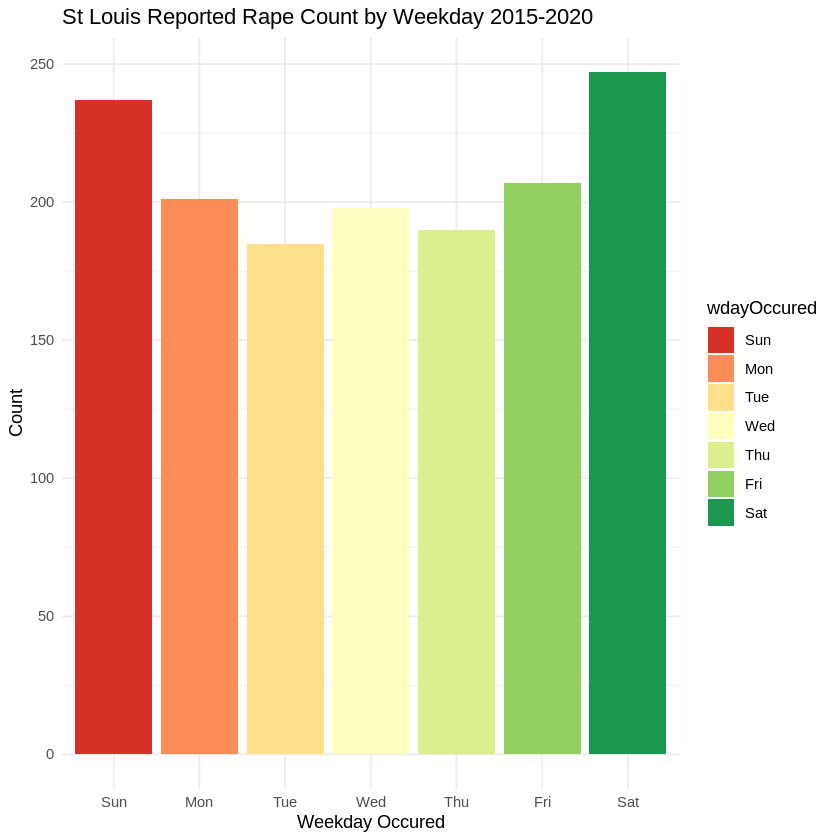

In [8]:
df_crime_rape %>% 
    ggplot(aes(wdayOccured, fill = wdayOccured)) + geom_bar() +
    labs(x='Weekday Occured',y='Count',
    title = 'St Louis Reported Rape Count by Weekday 2015-2020')+
    scale_fill_brewer(palette = "RdYlGn")+ theme_minimal()

### Observing how rape crime rate changed in the Neigbhorhoods of  St Louis, Mo            between 2019 and 2020

#### Note that 2020, was marked by lockdown due to covid-19

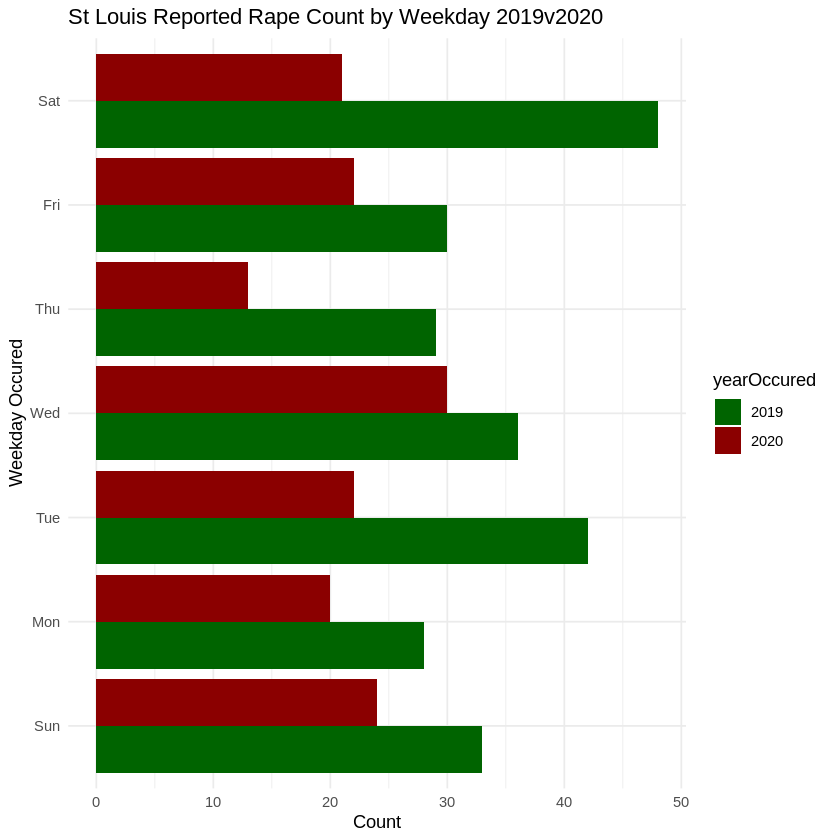

In [10]:
df_crime_rape %>% filter(as.numeric(as.character(yearOccured)) >= 2019) %>% 
    ggplot(aes(wdayOccured, fill = yearOccured)) + geom_bar(position="dodge") +
    labs(x='Weekday Occured',y='Count',
    title = 'St Louis Reported Rape Count by Weekday 2019v2020')+
    coord_flip()+
    scale_fill_manual(values = c("darkgreen","darkred")) +theme_minimal()

#### Having population data by neignborhood only for 2010 and 2020,  2019 data will be estimated
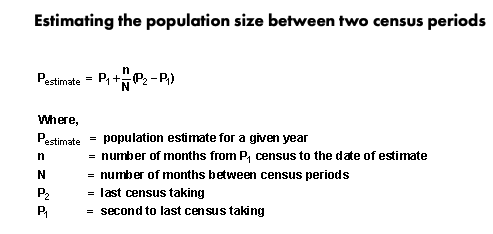

In [11]:
#projecting 2019 population from census 2010 and 2020
df_pop <- read.csv('proj_data/st_louis_population_2010_2020.csv')
df_pop <- df_pop %>% mutate(pop_2019 = round((pop_2010 + (116/120)*(pop_2020-pop_2010)),0))
head(df_pop)

Neighborhood,pop_2010,pop_2020,pop_2019
<fct>,<int>,<int>,<dbl>
Academy,2816,2355,2370
Baden,7268,5465,5525
Bellefontaine/Calvary Cemetery,0,0,0
Benton Park,3532,3581,3579
Benton Park West,4404,4238,4244
Bevo Mill,12654,11941,11965


In [12]:
# reading in the shapefile
library(sf)
bounds_df <- st_read('proj_data/st_louis_nbhd/Neighborhood_Boundaries.shp')

#remove leading zero from nbhd_num and unecessary cols
bounds_df  <- bounds_df %>% mutate(nbhd_num =as.factor(as.numeric(NHD_NUM_ST)))  %>% 
rename(nbhd_name = NHD_NAME,nbhd_num_name = NHD_NUMTXT) %>% select(-c('ANGLE','NHD_NUM','NHD_NUM_ST'))
head(bounds_df)

Linking to GEOS 3.6.2, GDAL 2.2.3, PROJ 4.9.3


Reading layer `Neighborhood_Boundaries' from data source `/dsa/home/hjdrwf/jupyter/f22dsa7040_hjdrwf/modules/module8/exercises/proj_data/st_louis_nbhd/Neighborhood_Boundaries.shp' using driver `ESRI Shapefile'
Simple feature collection with 88 features and 5 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: 871512.3 ymin: 982994.4 xmax: 912850.5 ymax: 1070957
epsg (SRID):    NA
proj4string:    +proj=tmerc +lat_0=35.83333333333334 +lon_0=-90.5 +k=0.9999333333333333 +x_0=250000 +y_0=0 +datum=NAD83 +units=us-ft +no_defs


nbhd_name,nbhd_num_name,nbhd_num,geometry
<fct>,<fct>,<fct>,<MULTIPOLYGON [US_survey_foot]>
Franz Park,43 Franz Park,43,MULTIPOLYGON (((877658 1016...
Tiffany,29 Tiffany,29,MULTIPOLYGON (((895417.8 10...
Botanical Heights,28 Botanical Heights,28,MULTIPOLYGON (((893871.8 10...
Kings Oak,40 Kings Oak,40,MULTIPOLYGON (((887474.7 10...
Cheltenham,41 Cheltenham,41,MULTIPOLYGON (((884617.9 10...
Clayton-Tamm,42 Clayton-Tamm,42,MULTIPOLYGON (((879840.8 10...


In [13]:
#Merge population data to shapefiles
pop_shp_df <- merge(df_pop,bounds_df, by.x = 'Neighborhood', by.y='nbhd_name')
head(pop_shp_df)

#creating neigborbhood count by years
# wider df to have the years a columns
df_crime_rape_wd <- df_crime_rape %>% 
    group_by(Neighborhood,yearOccured) %>% 
    summarize(crime_count = sum(Count))  %>% 
    pivot_wider(names_from = yearOccured, 
                values_from = crime_count,
                names_prefix = "count",
                names_sep = "_",
                values_fill = list(crime_count=0))  %>% 
    rename(neighborhood_num = Neighborhood)

head(df_crime_rape_wd)


Neighborhood,pop_2010,pop_2020,pop_2019,nbhd_num_name,nbhd_num,geometry
<fct>,<int>,<int>,<dbl>,<fct>,<fct>,<MULTIPOLYGON [US_survey_foot]>
Academy,2816,2355,2370,51 Academy,51,MULTIPOLYGON (((888299.1 10...
Baden,7268,5465,5525,74 Baden,74,MULTIPOLYGON (((899561.4 10...
Bellefontaine/Calvary Cemetery,0,0,0,86 Bellefontaine/Calvary Cemetery,86,MULTIPOLYGON (((897723.3 10...
Benton Park,3532,3581,3579,22 Benton Park,22,MULTIPOLYGON (((902328.9 10...
Benton Park West,4404,4238,4244,30 Benton Park West,30,MULTIPOLYGON (((898673 1004...
Bevo Mill,12654,11941,11965,5 Bevo Mill,5,MULTIPOLYGON (((888886.1 10...


neighborhood_num,count2015,count2016,count2017,count2018,count2019,count2020
<fct>,<int>,<int>,<int>,<int>,<int>,<int>
0,14,9,10,12,9,5
1,5,9,6,6,4,4
2,4,1,1,3,4,1
3,0,0,0,2,0,0
4,4,1,2,4,1,1
5,4,7,2,9,7,0


In [14]:
#merge all the datasets
merged_df_rp <- merge(df_crime_rape_wd,pop_shp_df, by.x = 'neighborhood_num', by.y='nbhd_num') 
#calculate rates and percentages
merged_df_rp  <- merged_df_rp  %>% mutate(rate_2019 =round((count2019/pop_2019)*100000,2),
                                         rate_2020 = round((count2020/pop_2020)*100000,2),
                                         rate_pcnt_change = round(((rate_2020 - rate_2019)/rate_2019)*100,2), 
                                         pop_pcnt_2019 = round((pop_2019/sum(pop_2019))*100,2),
                                         pop_pcnt_2020 = round((pop_2020/sum(pop_2020))*100,2),
                                         pop_pcnt_change =round(((pop_2020 - pop_2019)/pop_2019)*100,2) )

merged_df_rp <-merged_df_rp %>% 
    select(neighborhood_num,Neighborhood,nbhd_num_name,pop_2019,pop_2020,count2019,count2020,
                      rate_2019,rate_2020,rate_pcnt_change,pop_pcnt_2019,pop_pcnt_2020,pop_pcnt_change,geometry) %>% 
    st_as_sf()
head(merged_df_rp)

neighborhood_num,Neighborhood,nbhd_num_name,pop_2019,pop_2020,count2019,count2020,rate_2019,rate_2020,rate_pcnt_change,pop_pcnt_2019,pop_pcnt_2020,pop_pcnt_change,geometry
<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [US_survey_foot]>
1,Carondelet,1 Carondelet,7765,7734,4,4,51.51,51.72,0.41,2.59,2.59,-0.40,MULTIPOLYGON (((893349.4 99...
10,Ellendale,10 Ellendale,1391,1385,0,0,0.00,0.00,NaN,0.46,0.46,-0.43,MULTIPOLYGON (((880719.9 10...
11,Clifton Heights,11 Clifton Heights,2844,2836,1,0,35.16,0.00,-100.00,0.95,0.95,-0.28,MULTIPOLYGON (((880744.7 10...
12,The Hill,12 The Hill,2486,2487,3,0,120.68,0.00,-100.00,0.83,0.83,0.04,MULTIPOLYGON (((887038.5 10...
13,Southwest Garden,13 Southwest Garden,5233,5245,2,1,38.22,19.07,-50.10,1.75,1.76,0.23,MULTIPOLYGON (((888717 1014...
14,North Hampton,14 North Hampton,7502,7489,3,4,39.99,53.41,33.56,2.51,2.51,-0.17,MULTIPOLYGON (((880689.5 10...


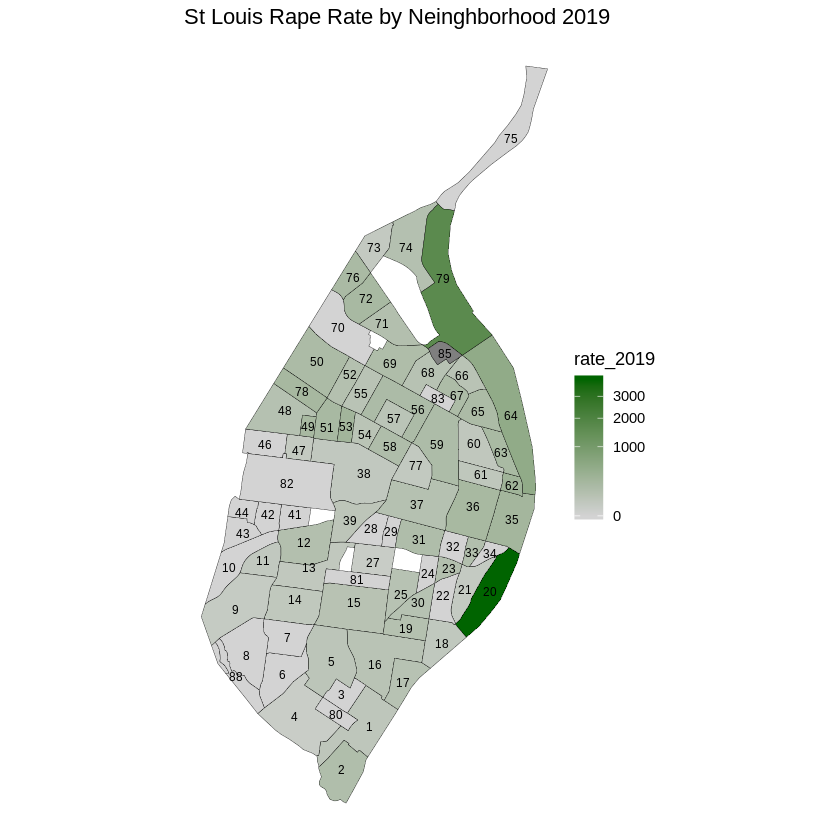

In [15]:
g1  <-  ggplot(merged_df_rp) + 
    geom_sf(aes(fill = rate_2019),color="black", size=0.1) +
    scale_fill_continuous(low = "lightgrey", high = "darkgreen",trans="sqrt")+
    geom_sf_text(aes(label =neighborhood_num),size=2.5,family="sans") +
    ggtitle('St Louis Rape Rate by Neinghborhood 2019') +
    theme_void()
    
g1

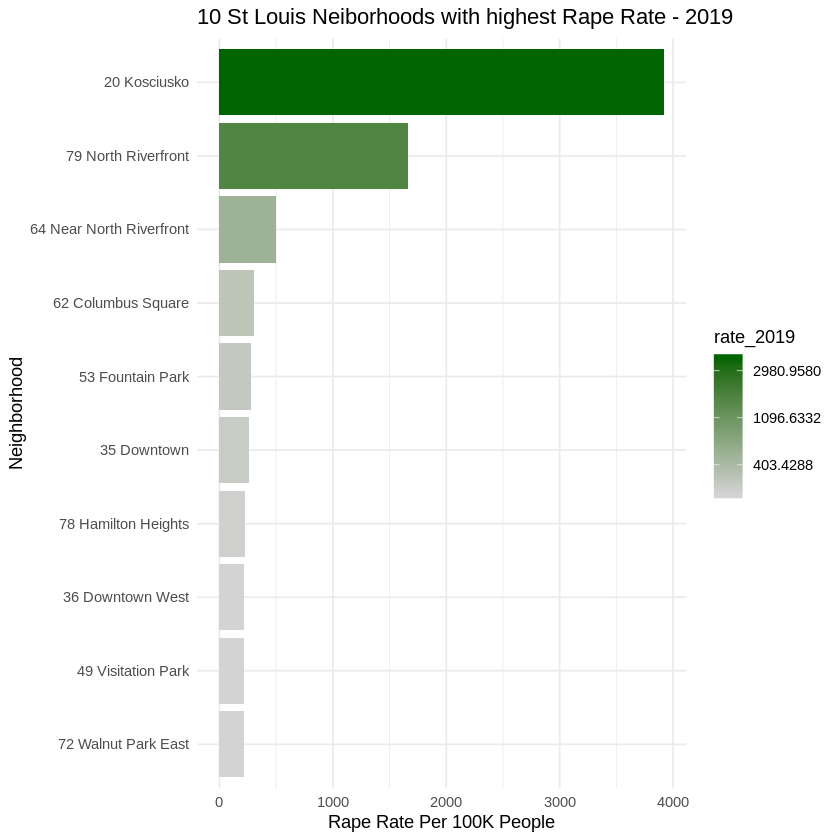

In [16]:
# Top ten neighborhoods 2019
g1_t10 <- merged_df_rp %>%
    select(nbhd_num_name,rate_2019) %>% 
    arrange(desc(rate_2019)) %>% head(10)  %>% 
    ggplot(aes(x=reorder(nbhd_num_name,rate_2019), y=rate_2019)) + 
    geom_bar(stat="identity",aes(fill = rate_2019))+
     scale_fill_continuous(low = "lightgrey", high = "darkgreen",trans='log')+
    coord_flip() +
    labs(x='Neighborhood',y='Rape Rate Per 100K People',
    title = '10 St Louis Neiborhoods with highest Rape Rate - 2019')+
    theme_minimal()
g1_t10

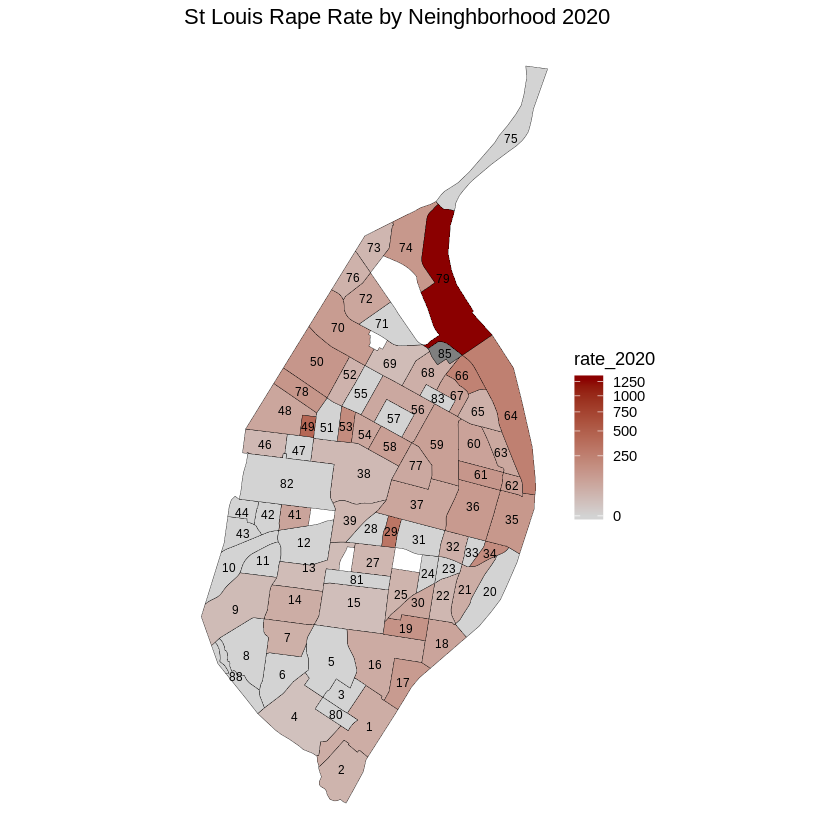

In [17]:
g2  <-  ggplot(merged_df_rp) + 
    geom_sf( aes(fill = rate_2020),color="black", size=0.1) +
    scale_fill_continuous(low = "lightgrey", high = "darkred",trans="sqrt") +
    geom_sf_text(aes(label =neighborhood_num),size=2.5,family="sans") +
    ggtitle('St Louis Rape Rate by Neinghborhood 2020') +
    theme_void()
    
g2

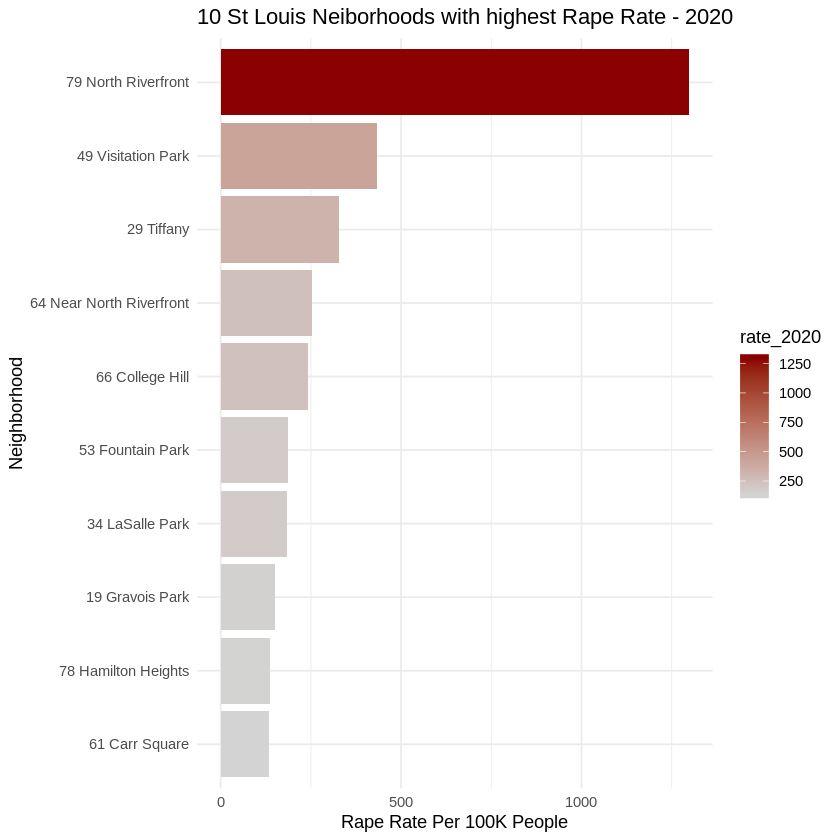

In [18]:
g2_t10 <- merged_df_rp %>%
    filter(neighborhood_num!='85') %>%
    select(nbhd_num_name,rate_2020) %>%  
    arrange(desc(rate_2020)) %>% head(10) %>% 
    ggplot(aes(x=reorder(nbhd_num_name,rate_2020), y=rate_2020)) + 
    geom_bar(stat="identity",aes(fill = rate_2020))+
    scale_fill_continuous(low ='lightgrey',high = "darkred")+
    coord_flip() +
    labs(x='Neighborhood',y='Rape Rate Per 100K People',
    title = '10 St Louis Neiborhoods with highest Rape Rate - 2020')+
    theme_minimal()
g2_t10

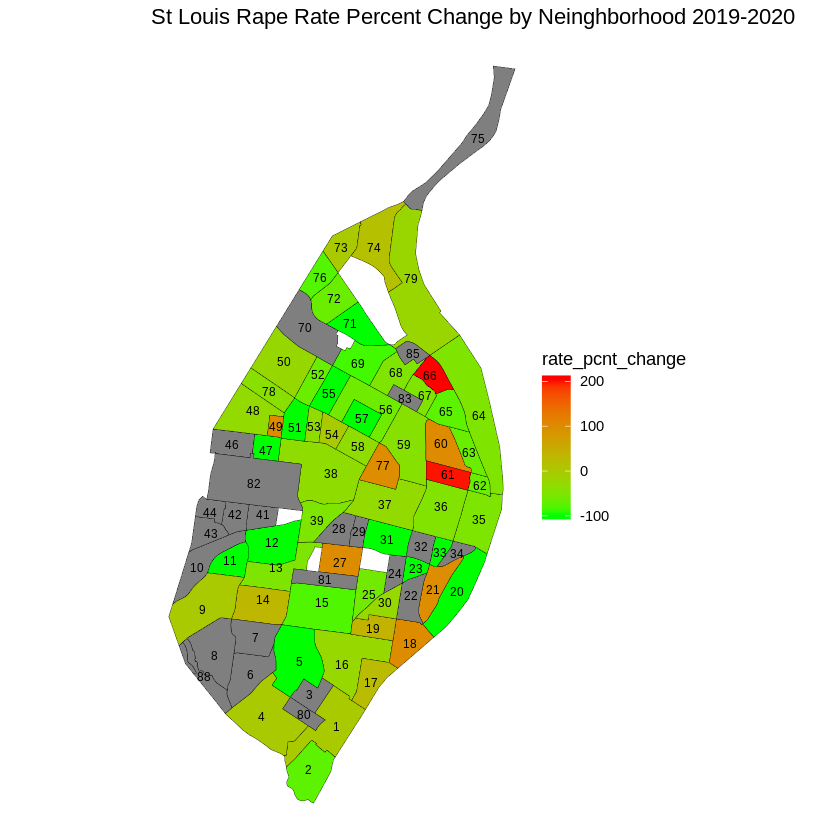

In [19]:
g3  <-  ggplot(merged_df_rp) + 
    geom_sf(aes(fill = rate_pcnt_change),color="black", size=0.1) +
    scale_fill_continuous(low = "green",high = "red")+
    geom_sf_text(aes(label =neighborhood_num),size=2.5,family="sans")+
    ggtitle('St Louis Rape Rate Percent Change by Neinghborhood 2019-2020')+
    theme_void()
    
g3

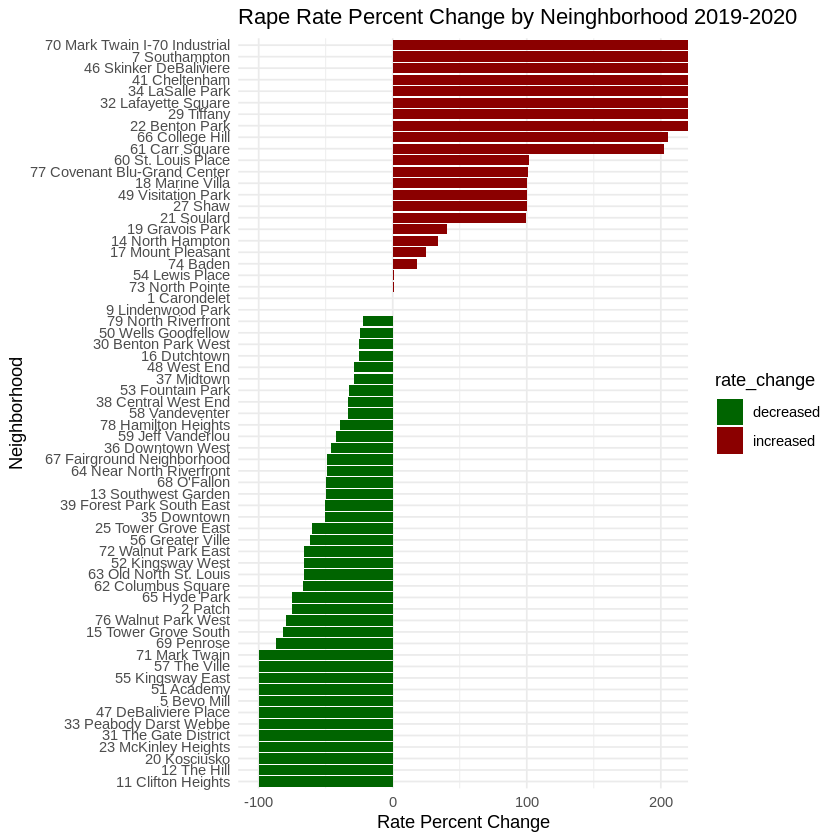

In [23]:
merged_df_rp$rate_change <-ifelse(merged_df_rp$rate_pcnt_change < 0, "decreased","increased")

merged_df_rp%>% filter(rate_pcnt_change!=0) %>% ggplot(aes(x=reorder(nbhd_num_name,rate_pcnt_change), y=rate_pcnt_change)) + 
geom_bar(stat="identity",aes(fill = rate_change))+
scale_fill_manual(values=c(increased="darkred",decreased="darkgreen")) + 
coord_flip() +
ggtitle('Rape Rate Percent Change by Neinghborhood 2019-2020')+
labs(x='Neighborhood',y='Rate Percent Change')+
theme_minimal()

### Let's have closer look of the most populated places

Warning message:
“Transformation introduced infinite values in discrete y-axis”

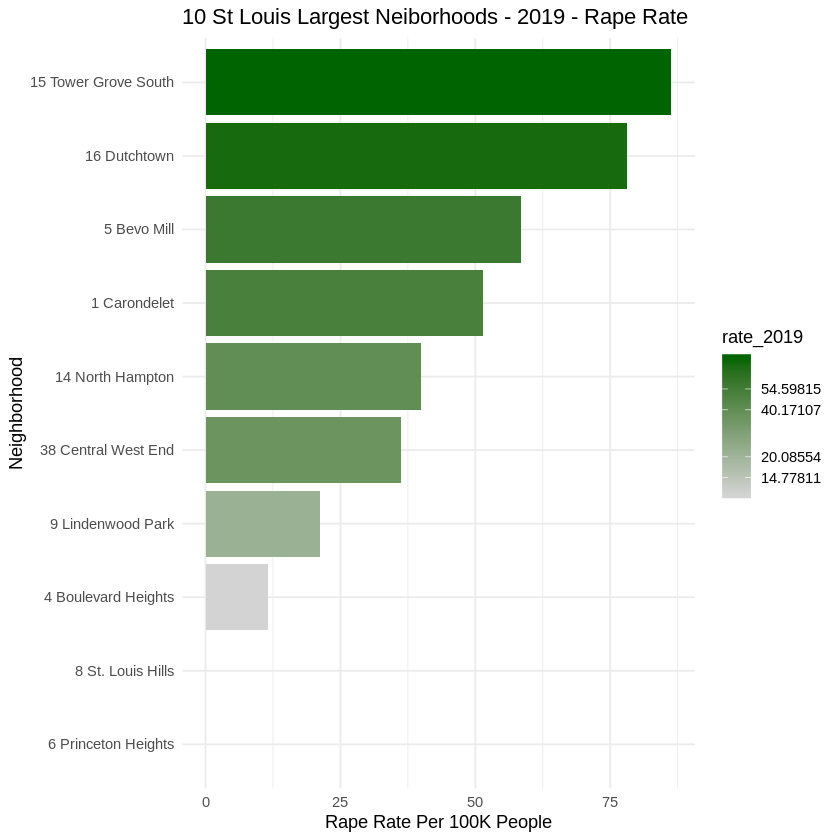

In [21]:
# Top ten largest neighborhoods 2019
g1_tpop10 <- merged_df_rp %>%
    arrange(desc(pop_2019)) %>% head(10)  %>% 
    select(nbhd_num_name,rate_2019) %>% 
    ggplot(aes(x=reorder(nbhd_num_name,rate_2019), y=rate_2019)) + 
    geom_bar(stat="identity",aes(fill = rate_2019))+
     scale_fill_continuous(low = "lightgrey", high = "darkgreen",trans='log')+
    coord_flip() +
    labs(x='Neighborhood',y='Rape Rate Per 100K People',
    title = '10 St Louis Largest Neiborhoods - 2019 - Rape Rate')+
    theme_minimal()
g1_tpop10

Warning message:
“Transformation introduced infinite values in discrete y-axis”

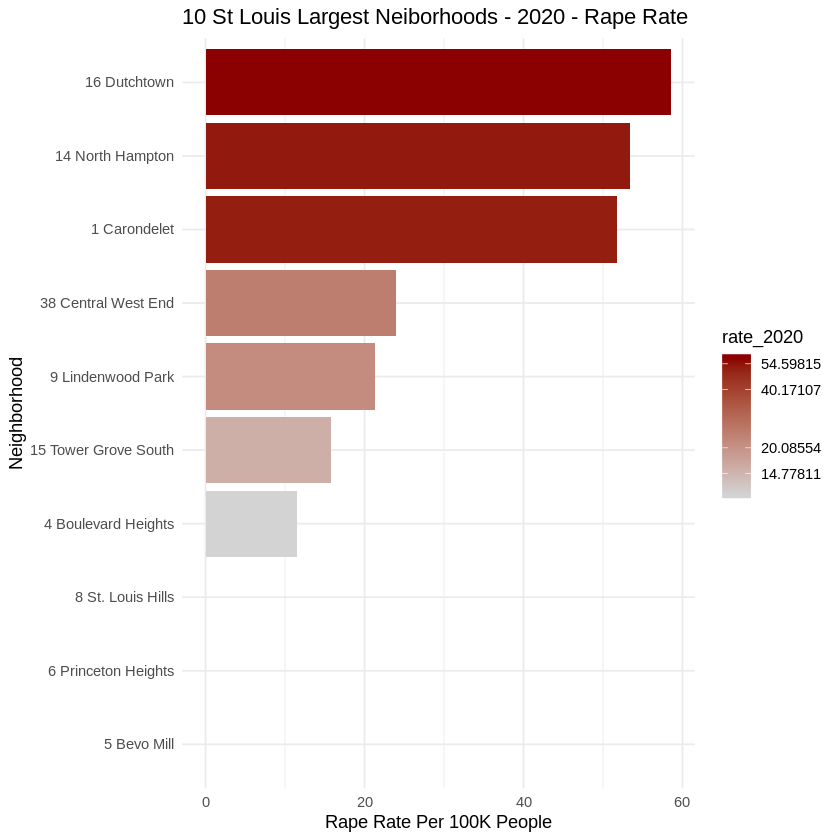

In [22]:
g2_tpop10 <- merged_df_rp %>%
    arrange(desc(pop_2020)) %>% head(10)  %>% 
    select(nbhd_num_name,rate_2020) %>% 
    ggplot(aes(x=reorder(nbhd_num_name,rate_2020), y=rate_2020)) + 
    geom_bar(stat="identity",aes(fill = rate_2020))+
     scale_fill_continuous(low = "lightgrey", high = "darkred",trans='log')+
    coord_flip() +
    labs(x='Neighborhood',y='Rape Rate Per 100K People',
    title = '10 St Louis Largest Neiborhoods - 2020 - Rape Rate')+
    theme_minimal()
g2_tpop10